# Load Google Drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd drive/MyDrive/Thesis/Paper2

/content/drive/MyDrive/Thesis/Paper2


# Imports + Load Data

In [5]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import makedata        # to get the CIFAR10 data in the required format
import models

In [6]:
totalClass = 5
shufflePixels = False # will generate noise here 
shuffleLabels = False

In [7]:
# Load data
_, y_train, _, y_test, a, b = makedata.cifar(totalClass, shufflePixels)

x_train = np.random.uniform(low=0, high=225, size=((5000*totalClass), 32, 32, 3))
x_test = np.random.uniform(low=0, high=225, size=((1000*totalClass), 32, 32, 3))
x_train = np.int8(x_train)
x_test = np.int8(x_test)

"""
Generate randome labels (equal likely)
"""

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

loaded data_batch_1
len of data_batch_1 :  10000
len of training data  10000
loaded data_batch_2
len of data_batch_2 :  10000
len of training data  20000
loaded data_batch_3
len of data_batch_3 :  10000
len of training data  30000
loaded data_batch_4
len of data_batch_4 :  10000
len of training data  40000
loaded data_batch_5
len of data_batch_5 :  10000
len of training data  50000
(25000, 32, 32, 3)
(25000, 5)
(5000, 32, 32, 3)
(5000, 5)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Populating the interactive namespace from numpy and matplotlib


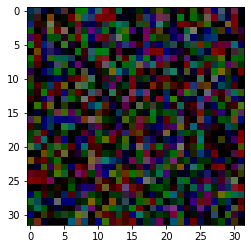

In [8]:
# Check Image data
im = x_train[88]
%pylab inline
imgplot = plt.imshow(im)
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

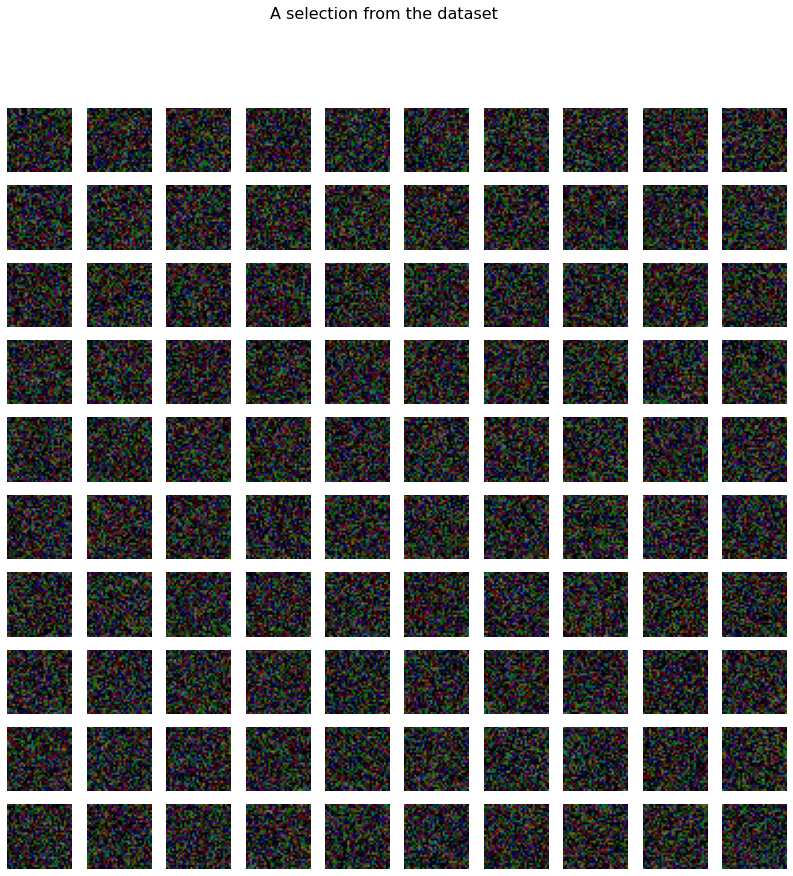

In [9]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(14, 14))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(x_train[idx], cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the dataset", fontsize=16)

#VGG16

In [10]:
vgg16 = models.vgg16(totalClass)
vgg16.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [11]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 11s 50ms/step - loss: 1.6165 - accuracy: 0.2000
test loss, test acc: [1.6164920330047607, 0.20000000298023224]
Evaluate on test data
10/10 [==============================] - 1s 137ms/step - loss: 1.6166 - accuracy: 0.2000
test loss, test acc: [1.6165587902069092, 0.20000000298023224]


In [12]:
vggResults = vgg16.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 9s 30ms/step - loss: 1.6107 - accuracy: 0.1974 - val_loss: 1.6104 - val_accuracy: 0.2000
Epoch 2/250
250/250 [==============================] - 7s 29ms/step - loss: 1.6097 - accuracy: 0.2017 - val_loss: 1.6098 - val_accuracy: 0.1976
Epoch 3/250
250/250 [==============================] - 7s 29ms/step - loss: 1.6093 - accuracy: 0.2075 - val_loss: 1.6102 - val_accuracy: 0.2000
Epoch 4/250
250/250 [==============================] - 7s 29ms/step - loss: 1.6091 - accuracy: 0.2057 - val_loss: 1.6096 - val_accuracy: 0.1990
Epoch 5/250
250/250 [==============================] - 7s 29ms/step - loss: 1.6084 - accuracy: 0.2115 - val_loss: 1.6106 - val_accuracy: 0.1962
Epoch 6/250
250/250 [==============================] - 7s 29ms/step - loss: 1.6083 - accuracy: 0.2143 - val_loss: 1.6098 - val_accuracy: 0.1998
Epoch 7/250
250/250 [==============================] - 7s 29ms/step - loss: 1.6078 - accuracy: 0.2178 - val_loss: 1.6104 - val_accuracy:

In [13]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = vgg16.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = vgg16.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 1s 28ms/step - loss: 1.2114e-06 - accuracy: 1.0000
test loss, test acc: [1.2114239780203206e-06, 1.0]
Evaluate on test data
10/10 [==============================] - 0s 27ms/step - loss: 11.0798 - accuracy: 0.2002
test loss, test acc: [11.07982063293457, 0.20020000636577606]


# Small

In [14]:
small = models.small(totalClass)
small.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-06),
            loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 1s 8ms/step - loss: 25.1562 - accuracy: 0.2000
test loss, test acc: [25.156227111816406, 0.20000000298023224]
Evaluate on test data
10/10 [==============================] - 0s 16ms/step - loss: 25.1610 - accuracy: 0.1996
test loss, test acc: [25.161026000976562, 0.1995999962091446]


In [16]:
smallResults = small.fit(x_train, y_train, 
                         batch_size=100, 
                         epochs=250, 
                         validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 2s 7ms/step - loss: 4.3235 - accuracy: 0.1969 - val_loss: 1.6096 - val_accuracy: 0.1932
Epoch 2/250
250/250 [==============================] - 2s 6ms/step - loss: 1.6227 - accuracy: 0.2019 - val_loss: 1.6094 - val_accuracy: 0.2012
Epoch 3/250
250/250 [==============================] - 2s 6ms/step - loss: 1.6148 - accuracy: 0.2001 - val_loss: 1.6094 - val_accuracy: 0.1992
Epoch 4/250
250/250 [==============================] - 2s 6ms/step - loss: 1.6149 - accuracy: 0.1997 - val_loss: 1.6094 - val_accuracy: 0.2002
Epoch 5/250
250/250 [==============================] - 2s 6ms/step - loss: 1.6143 - accuracy: 0.1968 - val_loss: 1.6094 - val_accuracy: 0.1998
Epoch 6/250
250/250 [==============================] - 2s 6ms/step - loss: 1.6138 - accuracy: 0.2000 - val_loss: 1.6094 - val_accuracy: 0.2000
Epoch 7/250
250/250 [==============================] - 2s 6ms/step - loss: 1.6133 - accuracy: 0.2010 - val_loss: 1.6094 - val_accuracy: 0.2008

In [17]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = small.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = small.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 0s 6ms/step - loss: 1.3487 - accuracy: 0.6216
test loss, test acc: [1.3486851453781128, 0.6216400265693665]
Evaluate on test data
10/10 [==============================] - 0s 6ms/step - loss: 1.6485 - accuracy: 0.1940
test loss, test acc: [1.6484886407852173, 0.1940000057220459]


#tNet

In [18]:
tNet = models.tNet(totalClass)
tNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [19]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 4s 50ms/step - loss: 1.9152 - accuracy: 0.1988
test loss, test acc: [1.915212869644165, 0.1987999975681305]
Evaluate on test data
10/10 [==============================] - 1s 96ms/step - loss: 1.9159 - accuracy: 0.2036
test loss, test acc: [1.9159355163574219, 0.20360000431537628]


In [20]:
tNetResults = tNet.fit(x_train,y_train,
                       batch_size=100,
                       epochs=250,
                       validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 12s 40ms/step - loss: 1.8717 - accuracy: 0.2050 - val_loss: 1.6696 - val_accuracy: 0.2042
Epoch 2/250
250/250 [==============================] - 10s 38ms/step - loss: 1.5742 - accuracy: 0.2916 - val_loss: 1.6775 - val_accuracy: 0.1946
Epoch 3/250
250/250 [==============================] - 10s 38ms/step - loss: 1.3740 - accuracy: 0.4326 - val_loss: 1.7249 - val_accuracy: 0.1970
Epoch 4/250
250/250 [==============================] - 10s 38ms/step - loss: 1.1601 - accuracy: 0.5609 - val_loss: 1.8345 - val_accuracy: 0.1970
Epoch 5/250
250/250 [==============================] - 10s 38ms/step - loss: 0.9417 - accuracy: 0.6664 - val_loss: 2.0130 - val_accuracy: 0.1974
Epoch 6/250
250/250 [==============================] - 10s 38ms/step - loss: 0.7398 - accuracy: 0.7480 - val_loss: 2.3159 - val_accuracy: 0.1952
Epoch 7/250
250/250 [==============================] - 10s 38ms/step - loss: 0.5611 - accuracy: 0.8184 - val_loss: 2.5655 - val_ac

In [21]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = tNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = tNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 2s 38ms/step - loss: 0.0040 - accuracy: 0.9993
test loss, test acc: [0.004006107337772846, 0.9992799758911133]
Evaluate on test data
10/10 [==============================] - 0s 37ms/step - loss: 6.1352 - accuracy: 0.2010
test loss, test acc: [6.135199546813965, 0.20100000500679016]


# ConvNet

In [22]:
convNet = models.convNet(totalClass)
convNet.compile(
    loss='categorical_crossentropy', 
    optimizer='SGD', 
    metrics=['accuracy'])

In [23]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 6s 81ms/step - loss: 2.6940 - accuracy: 0.2000
test loss, test acc: [2.693986654281616, 0.20003999769687653]
Evaluate on test data
10/10 [==============================] - 2s 220ms/step - loss: 2.6875 - accuracy: 0.2002
test loss, test acc: [2.687523126602173, 0.20020000636577606]


In [24]:
convNetResults = convNet.fit(x_train,y_train,
                             batch_size=100,
                             epochs=250,
                             validation_data=(x_test, y_test))

Epoch 1/250
250/250 [==============================] - 11s 39ms/step - loss: 1.7139 - accuracy: 0.1989 - val_loss: 1.6098 - val_accuracy: 0.2038
Epoch 2/250
250/250 [==============================] - 9s 38ms/step - loss: 1.6096 - accuracy: 0.1967 - val_loss: 1.6095 - val_accuracy: 0.1998
Epoch 3/250
250/250 [==============================] - 9s 38ms/step - loss: 1.6095 - accuracy: 0.1987 - val_loss: 1.6095 - val_accuracy: 0.2000
Epoch 4/250
250/250 [==============================] - 9s 38ms/step - loss: 1.6095 - accuracy: 0.1994 - val_loss: 1.6096 - val_accuracy: 0.1998
Epoch 5/250
250/250 [==============================] - 9s 38ms/step - loss: 1.6097 - accuracy: 0.1990 - val_loss: 1.6095 - val_accuracy: 0.1998
Epoch 6/250
250/250 [==============================] - 9s 38ms/step - loss: 1.6095 - accuracy: 0.1934 - val_loss: 1.6095 - val_accuracy: 0.1998
Epoch 7/250
250/250 [==============================] - 9s 38ms/step - loss: 1.6096 - accuracy: 0.1948 - val_loss: 1.6095 - val_accuracy

In [25]:
# Evaluate the model on the train data using `evaluate`
print("Evaluate on train data")
results = convNet.evaluate(x_train, y_train, batch_size=512)
print("test loss, test acc:", results)


# Evaluate the model on the test data using `evaluate`
print("Evaluate on test data")
results = convNet.evaluate(x_test, y_test, batch_size=512)
print("test loss, test acc:", results)

Evaluate on train data
49/49 [==============================] - 2s 45ms/step - loss: 1.6094 - accuracy: 0.2000
test loss, test acc: [1.6094383001327515, 0.20000000298023224]
Evaluate on test data
10/10 [==============================] - 0s 44ms/step - loss: 1.6094 - accuracy: 0.2000
test loss, test acc: [1.609438180923462, 0.20000000298023224]


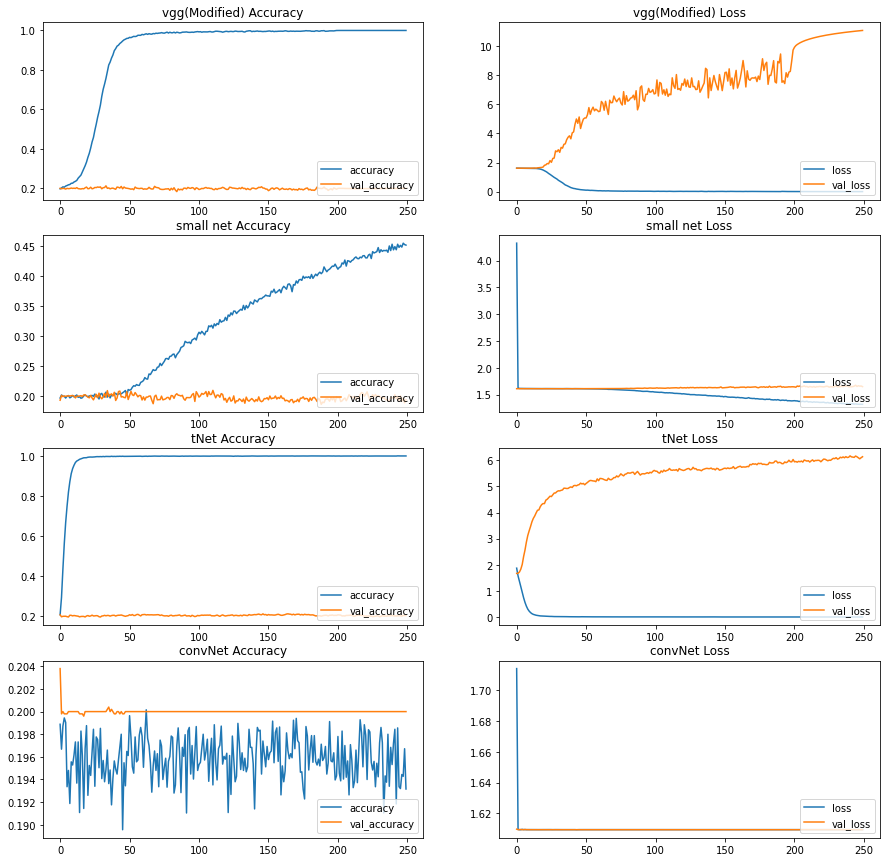

In [26]:
fig, axs = plt.subplots(4, 2, figsize=(15, 15))
i = 0
name = ['vgg(Modified)', 'small net', 'tNet', 'convNet']
for history in [vggResults, smallResults, tNetResults, convNetResults]:
    axs[i, 0].set_title(name[i]+" Accuracy", fontsize=12)
    axs[i, 0].plot(history.history['accuracy'], label='accuracy')
    axs[i, 0].plot(history.history['val_accuracy'], label = 'val_accuracy')
    #axs[i, 0].xlabel('Epoch')
    #axs[i, 0].ylabel('Accuracy')
    #axs[i, 0].ylim([0.5, 1])
    axs[i, 0].legend(loc='lower right')

    axs[i, 1].set_title(name[i]+" Loss", fontsize=12)
    axs[i, 1].plot(history.history['loss'], label='loss')
    axs[i, 1].plot(history.history['val_loss'], label = 'val_loss')
    #axs[i, 1].xlabel('Epoch')
    #axs[i, 1].ylabel('Loss')
    #axs[i, 1].ylim([0.0, 4.0])
    axs[i, 1].legend(loc='lower right')
    i = i + 1
